# Learning Keras Functional API with CIFAR100 Classification

I will be implementing a basic RESNET architecture to classify objects in the CIFAR-100 dataset

In [22]:
# Load all relevant modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import random
plt.style.use('seaborn')

In [4]:
# Load dataset
data_dir = "../../Datasets/CIFAR100"

classes = os.listdir(data_dir + "/TRAIN")
print(random.sample(classes, 10))
print(len(classes))

['snake', 'seal', 'mouse', 'bed', 'road', 'crab', 'cup', 'cockroach', 'worm', 'table']
100


In [51]:
# Load dataset

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

trainData = unpickle("train")

FileNotFoundError: [Errno 2] No such file or directory: 'train'

In [17]:
# function to generate 3 sample images of a random class
def plot_sample_images(data_dir, classes, n_images):
    # pick a random class
    class_name = random.sample(classes, 1)[0]
    # get all images of the class
    images = os.listdir(data_dir + "/TRAIN/" + class_name)
    # pick a random image
    image_name = random.sample(images, n_images)
    # plot the images
    plt.figure(figsize=(10, 10))
    for i in range(n_images):
        plt.subplot(1, n_images, i+1)
        plt.imshow(plt.imread(data_dir + "/TRAIN/" + class_name + "/" + image_name[i]))
        plt.axis('off')
    plt.suptitle(f"Label: {class_name}", fontsize=20)
    plt.show()

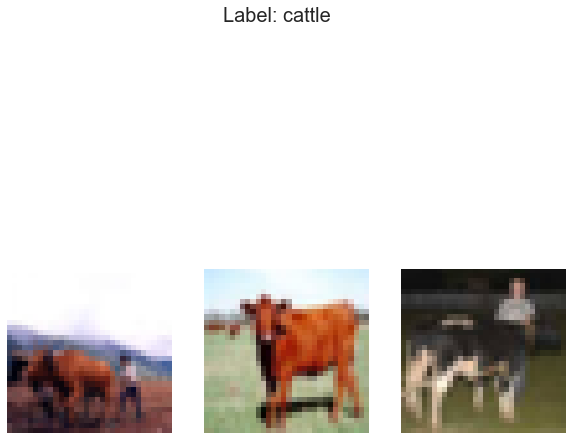

In [18]:
plot_sample_images(data_dir, classes, 3)

## Data Transformation & Augmentation

In [20]:
# Normalize the data
def normalize(x):
    return x/255.0


In [27]:
# Augmentation using imageDataGen

dataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=normalize,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)


In [28]:
batch_size = 400

In [44]:
# show augmentation
def show_random_augment(generator, classes):
    # pick a random class
    class_name = random.sample(classes, 1)[0]
    # get all images of the class
    images = os.listdir(data_dir + "/TRAIN/" + class_name)

    # pick a random image
    image_name = random.sample(images, 1)[0]
    # use the generator to augment the image
    augmented = next(generator.flow(np.expand_dims(plt.imread(data_dir + "/TRAIN/" +class_name + "/" + image_name), axis=0), batch_size=1))
    # plot the images
    plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.title(f"Original", fontsize=20)
    plt.imshow(plt.imread(data_dir + "/TRAIN/" + class_name + "/" + image_name))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(augmented[0])
    plt.title(f"Augmented", fontsize=20)
    plt.axis('off')

    plt.suptitle(f"Label: {class_name}", fontsize=20)
    plt.show()

    


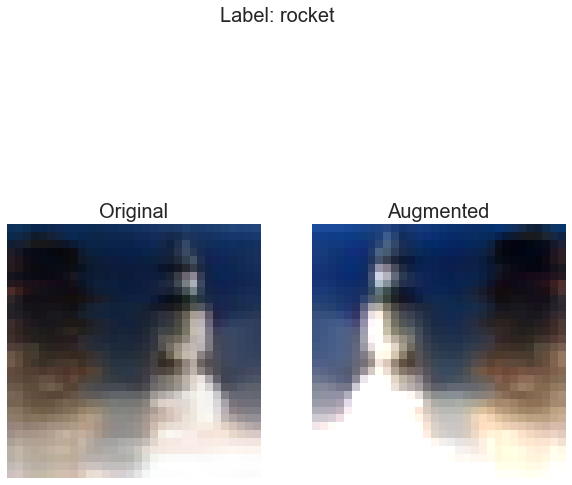

In [49]:
show_random_augment(dataGen, classes)

In [50]:
# train test split



['streetcar',
 'apple',
 'palm_tree',
 'man',
 'forest',
 'butterfly',
 'lamp',
 'wardrobe',
 'pear',
 'raccoon',
 'crab',
 'tractor',
 'aquarium_fish',
 'can',
 'tank',
 'snail',
 'bed',
 'cup',
 'television',
 'turtle',
 'boy',
 'mushroom',
 'bee',
 'fox',
 'willow_tree',
 'couch',
 'dolphin',
 'cattle',
 'maple_tree',
 'plain',
 'bear',
 'bridge',
 'leopard',
 'hamster',
 'lawn_mower',
 'lobster',
 'camel',
 'tiger',
 'road',
 'whale',
 'motorcycle',
 'crocodile',
 'dinosaur',
 'chair',
 'bus',
 'plate',
 'otter',
 'rose',
 'seal',
 'telephone',
 'mouse',
 'tulip',
 'porcupine',
 'beaver',
 'wolf',
 'lizard',
 'flatfish',
 'beetle',
 'chimpanzee',
 'poppy',
 'bowl',
 'table',
 'shrew',
 'skyscraper',
 'kangaroo',
 'cloud',
 'girl',
 'worm',
 'train',
 'house',
 'caterpillar',
 'spider',
 'rabbit',
 'cockroach',
 'rocket',
 'castle',
 'bicycle',
 'baby',
 'mountain',
 'sweet_pepper',
 'orchid',
 'sea',
 'skunk',
 'oak_tree',
 'squirrel',
 'ray',
 'bottle',
 'pickup_truck',
 'keyboard

In [ ]:
# plot the first 3 images of the random class

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

# generate a random class and plot first 5 images of that class
class_ = random.randint(0, 99)

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_train[class_][i])
    plt.axis('off')
    